# Project: Investigation of the TMDb Data set 

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

> The data set is gotten from The Movie Database (TMDb) which contains information of about 10,000 movies. 

> Before a movie can have a good rating, there must certain qualities the movie has and the viewers are looking forward to. Does the genre of a movie make it have a bettter rating? In terms of production how much has the production of a movie increased over the years? If a movie has a longer runtime does that mean more cost for the production company or do longer movies bore viewers giving it a lower rating? Which genre of movie has been produced overtime? Is there something particular about production companies that have made good profit overtime? Is producing a movie becoming more expensive than it was in the 90's? What genre of movie should a production company mostly like look into if it is to make profit?

> These are questions my investigation would like to answer and predict given data on the budget, user ratings and revenues

In [1]:
#import necessary packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

<a id='wrangling'></a>
## Data Wrangling
> Wrangling is all about cleaning messy data before analysis. Few issues that could affect analysis include a data having null values, duplicates or data types that are not right. This section will handle such issues to get a clean data good for proper analysis.


### General Properties
> Assessment of the dataset to check the datatypes, if there are any duplicates, null values and also dropping unnecessary columns to make the data as clean as possible for easy investigation

In [2]:
#Load dataset using pandas
movies_df=pd.read_csv('tmdb-movies.csv')
movies_df.head(5)

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [3]:
# Shape of data
movies_df.shape

(10866, 21)

In [4]:
#Information on the numbber of columns, rows and datatypes
movies_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       

In [5]:
# Checking for duplicates
movies_df.duplicated().sum()

1

In [6]:
# Drop duplicates
movies_df.drop_duplicates(inplace=True)
movies_df.duplicated().sum()

0

In [7]:
# Drop unnecessary columns
movies_df.drop(['imdb_id', 'homepage', 'tagline', 'overview', 'release_date', 'keywords', 'cast'], axis=1,inplace=True)
movies_df.head(1)

,id,popularity,budget,revenue,original_title,director,runtime,genres,production_companies,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,32.985763,150000000,1513528810,Jurassic World,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,5562,6.5,2015,1.379999e+08,1.392446e+09


In [8]:
# Checking for null values
movies_df.isnull().sum()

id                         0
popularity                 0
budget                     0
revenue                    0
original_title             0
director                  44
runtime                    0
genres                    23
production_companies    1030
vote_count                 0
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
dtype: int64

> There are null values in the cast, director, genres and production_companies column which will cause somes issues when exploring data which is why we would be dropping null values using dropna

In [9]:
# dropping null values
movies_df.dropna(inplace=True)

In [10]:
# Checking to see if the change has been effected
movies_df.isnull().sum()

id                      0
popularity              0
budget                  0
revenue                 0
original_title          0
director                0
runtime                 0
genres                  0
production_companies    0
vote_count              0
vote_average            0
release_year            0
budget_adj              0
revenue_adj             0
dtype: int64

### Data Cleaning
>
> So far we have dealt with issues of duplicates and missing numbers but there is one last issue with our data which has a pipe '|' symbol in some columns like cast, production companies and genres. This definitely has to be taken care of
>
> This is done by splitting the columns with '|' into multiple rows. We would first drop the affected column, remove the pipe symbol using str.split.

In [11]:
# Splitting the genres column into multiple rows
movies_df=movies_df.drop('genres', axis=1).join(movies_df['genres'].str.split('|', expand=True).stack().reset_index(level=1, drop=True).rename('genres'))
movies_df

,id,popularity,budget,revenue,original_title,director,runtime,production_companies,vote_count,vote_average,release_year,budget_adj,revenue_adj,genres
0,135397,32.985763,150000000,1513528810,Jurassic World,Colin Trevorrow,124,Universal Studios|Amblin Entertainment|Legenda...,5562,6.5,2015,1.379999e+08,1.392446e+09,Action
0,135397,32.985763,150000000,1513528810,Jurassic World,Colin Trevorrow,124,Universal Studios|Amblin Entertainment|Legenda...,5562,6.5,2015,1.379999e+08,1.392446e+09,Adventure
0,135397,32.985763,150000000,1513528810,Jurassic World,Colin Trevorrow,124,Universal Studios|Amblin Entertainment|Legenda...,5562,6.5,2015,1.379999e+08,1.392446e+09,Science Fiction
0,135397,32.985763,150000000,1513528810,Jurassic World,Colin Trevorrow,124,Universal Studios|Amblin Entertainment|Legenda...,5562,6.5,2015,1.379999e+08,1.392446e+09,Thriller
1,76341,28.419936,150000000,378436354,Mad Max: Fury Road,George Miller,120,Village Roadshow Pictures|Kennedy Miller Produ...,6185,7.1,2015,1.379999e+08,3.481613e+08,Action
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10863,39768,0.065141,0,0,Beregis Avtomobilya,Eldar Ryazanov,94,Mosfilm,11,6.5,1966,0.000000e+00,0.000000e+00,Mystery
10863,39768,0.065141,0,0,Beregis Avtomobilya,Eldar Ryazanov,94,Mosfilm,11,6.5,1966,0.000000e+00,0.000000e+00,Comedy
10864,21449,0.064317,0,0,"What's Up, Tiger Lily?",Woody Allen,80,Benedict Pictures Corp.,22,5.4,1966,0.000000e+00,0.000000e+00,Action
10864,21449,0.064317,0,0,"What's Up, Tiger Lily?",Woody Allen,80,Benedict Pictures Corp.,22,5.4,1966,0.000000e+00,0.000000e+00,Comedy


In [12]:
# Splitting production companies
movies_df= movies_df.drop('production_companies', axis=1).join(movies_df['production_companies'].str.split('|', expand=True).stack().reset_index(level=1, drop=True).rename('production_companies'))
movies_df

,id,popularity,budget,revenue,original_title,director,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj,genres,production_companies
0,135397,32.985763,150000000,1513528810,Jurassic World,Colin Trevorrow,124,5562,6.5,2015,1.379999e+08,1.392446e+09,Action,Universal Studios
0,135397,32.985763,150000000,1513528810,Jurassic World,Colin Trevorrow,124,5562,6.5,2015,1.379999e+08,1.392446e+09,Action,Amblin Entertainment
0,135397,32.985763,150000000,1513528810,Jurassic World,Colin Trevorrow,124,5562,6.5,2015,1.379999e+08,1.392446e+09,Action,Legendary Pictures
0,135397,32.985763,150000000,1513528810,Jurassic World,Colin Trevorrow,124,5562,6.5,2015,1.379999e+08,1.392446e+09,Action,Fuji Television Network
0,135397,32.985763,150000000,1513528810,Jurassic World,Colin Trevorrow,124,5562,6.5,2015,1.379999e+08,1.392446e+09,Action,Dentsu
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10864,21449,0.064317,0,0,"What's Up, Tiger Lily?",Woody Allen,80,22,5.4,1966,0.000000e+00,0.000000e+00,Action,Benedict Pictures Corp.
10864,21449,0.064317,0,0,"What's Up, Tiger Lily?",Woody Allen,80,22,5.4,1966,0.000000e+00,0.000000e+00,Action,Benedict Pictures Corp.
10864,21449,0.064317,0,0,"What's Up, Tiger Lily?",Woody Allen,80,22,5.4,1966,0.000000e+00,0.000000e+00,Comedy,Benedict Pictures Corp.
10864,21449,0.064317,0,0,"What's Up, Tiger Lily?",Woody Allen,80,22,5.4,1966,0.000000e+00,0.000000e+00,Comedy,Benedict Pictures Corp.


<a id='eda'></a>
## Exploratory Data Analysis

###  1) What movie genre has mostly been produced?

> Some movies have alot of genres, example the Jurassic World which is acombination of Action, Adventure, Science Fiction and Thriller. To get each individual genres we will be using the str.split and the value_count to know the number of occurrence.

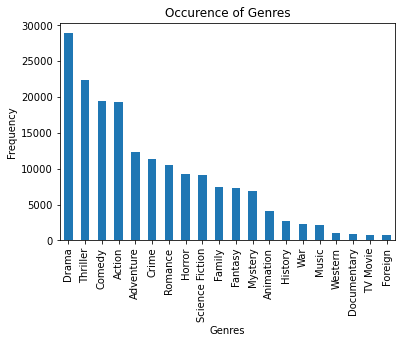

In [13]:
# Count for the various genres
genre_count= movies_df['genres'].value_counts()
genre_count.plot(kind='bar', title='Occurence of Genres', ylabel='Frequency', xlabel='Genres');

> Using the value_counts function to check the number of times a particular genre of movie apppears in the dataframe. From the plot above it shows that a lot of movies in the drama genre has been produced over the years followed by Thriller, Comedy and Action. The least produced are Western, Documentary, TV movie and Foreign.

### 2) Are movies with shorter runtime more popular than movies with a longer runtime?

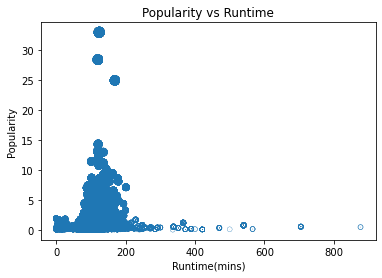

In [14]:
# Using the scatter plot
x_axis= movies_df['runtime']
y_axis= movies_df['popularity']
plt.scatter(x_axis, y_axis, linewidths= 5, s=y_axis)
plt.xlabel('Runtime(mins)')
plt.ylabel('Popularity')
plt.title('Popularity vs Runtime')
plt.show()

> It sure does look like movies not greater than 200 mins runtime have more popularity as compared to movies that have runtime greater than 200 mins. 

### 3) What genre of movie have longer runtime?

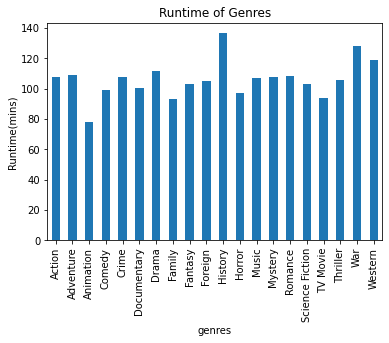

In [15]:
# Grouping dataframe by genres and getting the mean of runtime
gen_runtime=movies_df.groupby('genres').runtime.mean()
gen_runtime.plot(kind='bar', title="Runtime of Genres", ylabel="Runtime(mins)");

> History sure does take alot of time since it is showing "history".  From the plot above the History has a high runtime followed by war while animation has the shortest. 

### 4) Which year did Historic movie come more in production

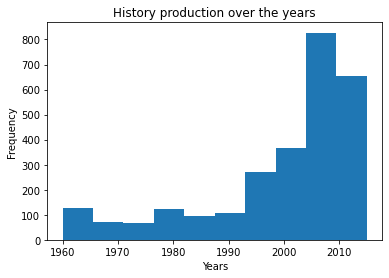

In [16]:
# Selecting the History genre only from the data
h_gen=movies_df.query('genres == "History"')
h_year=h_gen['release_year']

plt.hist(h_year, bins= 10)
plt.xlabel('Years')
plt.ylabel('Frequency')
plt.title('History production over the years')
plt.show()

> The histogram above shows Historic movie came more into production around the year 2000. I could imagine one reason might be because people were beginning to "loose sight" of where they came from or how some things came into being. 

### 5) What genre gets the highest rating?


In [17]:
# Grouping dataframe by genres
gen=movies_df.groupby('genres')
gen.first(1)

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
genres,,,,,,,,,,
Action,135397,32.985763,150000000,1513528810,124,5562,6.5,2015,1.379999e+08,1.392446e+09
Adventure,135397,32.985763,150000000,1513528810,124,5562,6.5,2015,1.379999e+08,1.392446e+09
Animation,211672,7.404165,74000000,1156730962,91,2893,6.5,2015,6.807997e+07,1.064192e+09
Comedy,211672,7.404165,74000000,1156730962,91,2893,6.5,2015,6.807997e+07,1.064192e+09
Crime,168259,9.335014,190000000,1506249360,137,2947,7.3,2015,1.747999e+08,1.385749e+09
Documentary,331781,0.738404,0,8413144,128,345,7.5,2015,0.000000e+00,7.740089e+06
Drama,281957,9.110700,135000000,532950503,156,3929,7.2,2015,1.241999e+08,4.903142e+08
Family,211672,7.404165,74000000,1156730962,91,2893,6.5,2015,6.807997e+07,1.064192e+09
Fantasy,140607,11.173104,200000000,2068178225,136,5292,7.5,2015,1.839999e+08,1.902723e+09


In [18]:
# Creating function that gets the mean vote_count(rating) for each genre
def get_group(genre):
    for g in gen:
        result = gen.get_group(genre).vote_count.mean()
    return result

In [19]:
# Getting the mean of vote count for each genre
d = get_group('Drama')
c = get_group('Comedy')
t = get_group('Thriller')
a = get_group('Action')
r = get_group('Romance')
h = get_group('Horror')
ad = get_group('Adventure')
cr = get_group('Crime')
sf = get_group('Science Fiction')
f = get_group('Family')
fa = get_group('Fantasy')
fo = get_group('Foreign')
m = get_group('Mystery')
an = get_group('Animation')
mu = get_group('Music')
do = get_group('Documentary')
hi = get_group('History')
w = get_group('War')
we = get_group('Western')
tm = get_group('TV Movie')

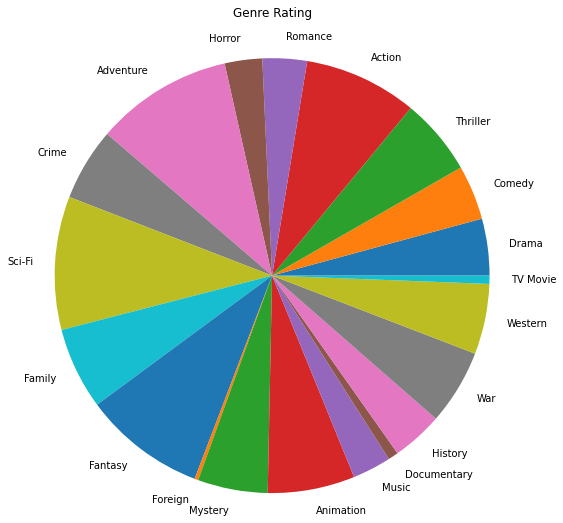

In [20]:
# Plotting pie chart
x= np.array([d,c,t,a,r,h,ad,cr,sf,f,fa,fo,m,an,mu,do,hi,w,we,tm])
label = ["Drama", "Comedy", "Thriller", "Action", "Romance", "Horror", "Adventure", "Crime","Sci-Fi","Family", "Fantasy","Foreign", "Mystery","Animation", "Music", "Documentary", "History", "War", "Western",
       "TV Movie"]
plt.pie(x, radius=2.5, labels=label)
plt.title('Genre Rating', loc='center', pad=150)
plt.show()

> From the pie chart above Science fiction (Sci-Fi), Adventure, Action and Comedy have high rating but the Foreign, TVmovie, Documentary have really low ratings

### 6) How has cost of movie production (budget) increased over the years?

In [21]:
# Checking for the years present in the dataframe using unique
movies_df['release_year'].unique()

array([2015, 2014, 1977, 2009, 2010, 1999, 2001, 2008, 2011, 2002, 1994,
       2012, 2003, 1997, 2013, 1985, 2005, 2006, 2004, 1972, 1980, 2007,
       1979, 1984, 1983, 1995, 1992, 1981, 1996, 2000, 1982, 1998, 1989,
       1991, 1988, 1987, 1968, 1974, 1975, 1962, 1964, 1971, 1990, 1961,
       1960, 1976, 1993, 1967, 1963, 1986, 1973, 1970, 1965, 1969, 1978,
       1966], dtype=int64)

In [22]:
# Using groupby to group dataframe based on the release year and using the mean value of the budget for the various unique years
prod_inc= movies_df.groupby('release_year').budget.mean()
prod_inc

release_year
1960    7.261420e+05
1961    1.566807e+06
1962    2.783221e+06
1963    3.916965e+06
1964    1.130922e+06
1965    2.608874e+06
1966    2.078967e+06
1967    4.421649e+06
1968    3.958268e+06
1969    1.820711e+06
1970    5.550570e+06
1971    2.406095e+06
1972    1.292480e+06
1973    1.056945e+06
1974    1.748054e+06
1975    1.374003e+06
1976    2.101521e+06
1977    4.261962e+06
1978    5.106105e+06
1979    4.714169e+06
1980    6.709815e+06
1981    4.019489e+06
1982    6.959333e+06
1983    9.993418e+06
1984    1.051236e+07
1985    1.220779e+07
1986    6.730720e+06
1987    8.443699e+06
1988    1.210826e+07
1989    1.001786e+07
1990    1.227156e+07
1991    1.737534e+07
1992    1.445129e+07
1993    1.334378e+07
1994    1.605436e+07
1995    1.943593e+07
1996    2.341219e+07
1997    3.399633e+07
1998    3.284568e+07
1999    3.527684e+07
2000    3.889341e+07
2001    3.531169e+07
2002    3.010148e+07
2003    3.888450e+07
2004    4.292560e+07
2005    3.598613e+07
2006    3.065979e+07


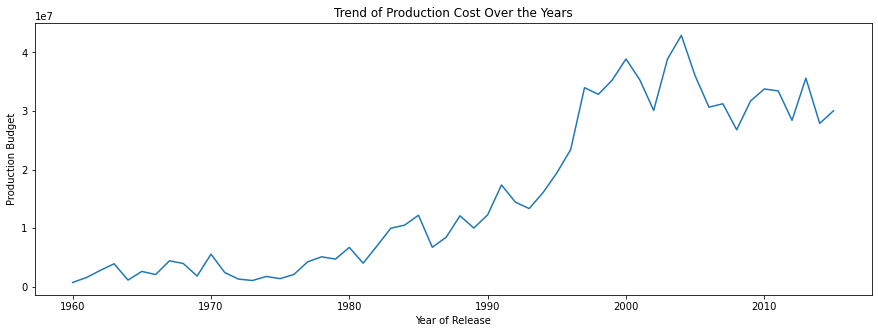

In [23]:
# Plotting the line graph
prod_inc.plot(kind='line', figsize=(15,5), use_index= True, title= 'Trend of Production Cost Over the Years', xlabel= 'Year of Release', ylabel= 'Production Budget');

> Plotting all the data in the same line graph does not show the full trend of the increase or decrease till the last year which is 2015, for better analysis we will be grouping the years from 1960-1999 and 2000-2015.

In [24]:
# Selecting the release year at specific integer positions using iloc
# This is to split the release year into the first half (1960-1999)
first_half=prod_inc.iloc[:40]
first_half

release_year
1960    7.261420e+05
1961    1.566807e+06
1962    2.783221e+06
1963    3.916965e+06
1964    1.130922e+06
1965    2.608874e+06
1966    2.078967e+06
1967    4.421649e+06
1968    3.958268e+06
1969    1.820711e+06
1970    5.550570e+06
1971    2.406095e+06
1972    1.292480e+06
1973    1.056945e+06
1974    1.748054e+06
1975    1.374003e+06
1976    2.101521e+06
1977    4.261962e+06
1978    5.106105e+06
1979    4.714169e+06
1980    6.709815e+06
1981    4.019489e+06
1982    6.959333e+06
1983    9.993418e+06
1984    1.051236e+07
1985    1.220779e+07
1986    6.730720e+06
1987    8.443699e+06
1988    1.210826e+07
1989    1.001786e+07
1990    1.227156e+07
1991    1.737534e+07
1992    1.445129e+07
1993    1.334378e+07
1994    1.605436e+07
1995    1.943593e+07
1996    2.341219e+07
1997    3.399633e+07
1998    3.284568e+07
1999    3.527684e+07
Name: budget, dtype: float64

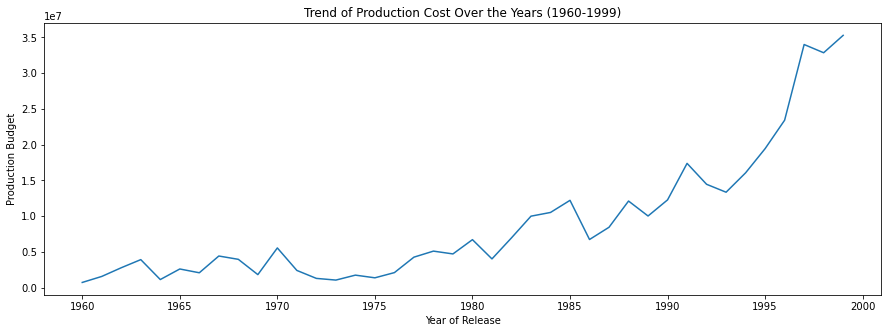

In [25]:
# Plotting line graph for first half
first_half.plot(kind='line', figsize=(15,5), use_index= True, title= 'Trend of Production Cost Over the Years (1960-1999)', xlabel= 'Year of Release', ylabel= 'Production Budget');

In [26]:
# Second half
second_half=prod_inc.iloc[40:]
second_half

release_year
2000    3.889341e+07
2001    3.531169e+07
2002    3.010148e+07
2003    3.888450e+07
2004    4.292560e+07
2005    3.598613e+07
2006    3.065979e+07
2007    3.124087e+07
2008    2.679908e+07
2009    3.170630e+07
2010    3.377288e+07
2011    3.343436e+07
2012    2.841829e+07
2013    3.561828e+07
2014    2.789579e+07
2015    3.004250e+07
Name: budget, dtype: float64

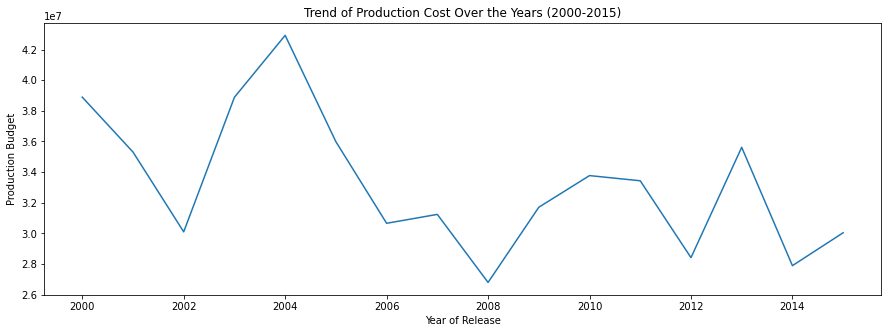

In [27]:
# Plotting the line graph of second half 
second_half.plot(kind='line', figsize=(15,5), use_index= True, title= 'Trend of Production Cost Over the Years (2000-2015)', xlabel= 'Year of Release', ylabel= 'Production Budget');

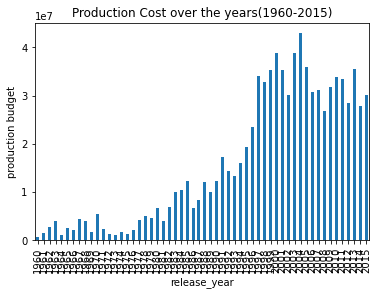

In [28]:
# Showing trend in a bar graph for 1960-2015
prod_inc.plot(kind='bar', ylabel='production budget', title='Production Cost over the years(1960-2015)');

From the line graph production cost gradually increased from 1960 to about 1995 but had a very sharp increase around 1996-2000 then with a fluctuating increase and decrease through 2000-2015. If the two graphs were to be merged we would see that production cost has not returned to what it used to be in the 90's but this can be seen in the bar graph. 2004 has the highest value of production cost

### 7) Do longer(higher runtime) movies automatically mean more cost?

In [29]:
# Group data by runtime
y=movies_df.groupby('runtime').budget
y.first()

runtime
0              0
2              0
3              0
4              0
5              0
         ...    
500            0
540    120000000
566            0
705            0
877            0
Name: budget, Length: 226, dtype: int64

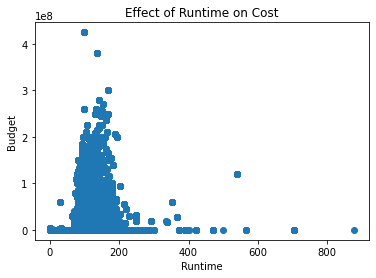

In [30]:
# Plotting a scatterplot
x = movies_df['runtime']
y = movies_df['budget']
plt.scatter(x,y)
plt.xlabel('Runtime')
plt.ylabel('Budget')
plt.title('Effect of Runtime on Cost')
plt.show()

> Though it felt like the longer the movie the more the cost, it is not actually the case. Though this data has a lot of zero values for both the budget and the runtime. Therefore, we cannot make a final decision.

### 8) What characteristics do movies with high profit and low profit have
>
> We will be calculating the profit by subtracting budget from revenue.

In [31]:
# Revenue - Budget
comp_prof=movies_df['revenue']- movies_df['budget']
comp_prof

0        1363528810
0        1363528810
0        1363528810
0        1363528810
0        1363528810
            ...    
10864             0
10864             0
10864             0
10864             0
10865        -19000
Length: 178930, dtype: int64

In [32]:
# Creating another column in the existing dataframe to show the profit
movies_df['profit']=comp_prof
movies_df.head(2)

,id,popularity,budget,revenue,original_title,director,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj,genres,production_companies,profit
0,135397,32.985763,150000000,1513528810,Jurassic World,Colin Trevorrow,124,5562,6.5,2015,1.379999e+08,1.392446e+09,Action,Universal Studios,1363528810
0,135397,32.985763,150000000,1513528810,Jurassic World,Colin Trevorrow,124,5562,6.5,2015,1.379999e+08,1.392446e+09,Action,Amblin Entertainment,1363528810


In [33]:
movies_df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj,profit
count,178930.000000,178930.000000,1.789300e+05,1.789300e+05,178930.000000,178930.000000,178930.000000,178930.000000,1.789300e+05,1.789300e+05,1.789300e+05
mean,52451.375119,0.924334,2.711748e+07,7.125460e+07,105.751277,375.752076,5.968682,2001.812938,3.128381e+07,8.536284e+07,4.413713e+07
std,80883.454816,1.419168,4.208118e+07,1.623083e+08,26.369530,787.527833,0.854809,11.721233,4.531693e+07,1.858335e+08,1.349261e+08
min,5.000000,0.000188,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00,-4.139124e+08
25%,9488.000000,0.292125,0.000000e+00,0.000000e+00,93.000000,26.000000,5.500000,1996.000000,0.000000e+00,0.000000e+00,-4.893990e+05
50%,14873.000000,0.537898,8.000000e+06,4.636169e+06,102.000000,83.000000,6.000000,2005.000000,1.051669e+07,5.690315e+06,0.000000e+00
75%,49948.000000,1.056168,3.800000e+07,6.885148e+07,115.000000,330.000000,6.500000,2010.000000,4.609198e+07,8.631506e+07,3.308255e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,877.000000,9767.000000,8.700000,2015.000000,4.250000e+08,2.827124e+09,2.544506e+09


In [34]:
# Only data with profit greater than the profit mean
high_profit=movies_df.query('profit>profit.mean()')

In [35]:
high_profit.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj,profit
count,40594.000000,40594.000000,4.059400e+04,4.059400e+04,40594.000000,40594.000000,40594.000000,40594.000000,4.059400e+04,4.059400e+04,4.059400e+04
mean,37301.819136,2.152321,6.927376e+07,2.688516e+08,114.190545,1197.718111,6.351998,2003.326329,7.714357e+07,3.172788e+08,1.995778e+08
std,64108.423285,2.445039,5.512790e+07,2.513853e+08,22.262385,1283.486504,0.714969,9.708891,5.609993e+07,2.804861e+08,2.188010e+08
min,11.000000,0.044675,0.000000e+00,4.500000e+07,44.000000,10.000000,3.400000,1960.000000,0.000000e+00,4.205324e+07,4.428700e+07
25%,1904.000000,0.997525,2.700000e+07,1.156640e+08,100.000000,332.000000,5.900000,1998.000000,3.392893e+07,1.429501e+08,7.266665e+07
50%,9740.000000,1.552666,5.840000e+07,1.860537e+08,110.000000,743.000000,6.300000,2005.000000,6.767113e+07,2.265344e+08,1.252165e+08
75%,41216.000000,2.508235,1.000000e+08,3.411318e+08,126.000000,1578.000000,6.900000,2011.000000,1.123240e+08,4.007917e+08,2.474519e+08
max,417859.000000,32.985763,3.800000e+08,2.781506e+09,705.000000,9767.000000,8.300000,2015.000000,3.683713e+08,2.827124e+09,2.544506e+09


In [36]:
# Only data with profit less than the profit mean
low_profit=movies_df.query('profit<profit.mean()')

In [37]:
low_profit.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj,profit
count,138336.000000,138336.000000,1.383360e+05,1.383360e+05,138336.000000,138336.000000,138336.000000,138336.000000,1.383360e+05,1.383360e+05,1.383360e+05
mean,56896.935751,0.563987,1.474693e+07,1.327078e+07,103.274816,134.550298,5.856200,2001.368841,1.782650e+07,1.730826e+07,-1.476154e+06
std,84668.682133,0.527682,2.691001e+07,2.666583e+07,26.961746,249.723214,0.859855,12.213660,3.056936e+07,3.417400e+07,1.812123e+07
min,5.000000,0.000188,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00,-4.139124e+08
25%,10486.000000,0.250947,0.000000e+00,0.000000e+00,91.000000,21.000000,5.300000,1995.000000,0.000000e+00,0.000000e+00,-4.729478e+06
50%,16973.000000,0.424885,1.000000e+06,0.000000e+00,100.000000,49.000000,5.900000,2005.000000,1.381637e+06,0.000000e+00,0.000000e+00
75%,54093.000000,0.699883,2.000000e+07,1.600000e+07,111.000000,138.000000,6.400000,2010.000000,2.469335e+07,2.178060e+07,5.580000e+05
max,414419.000000,8.947905,4.250000e+08,2.841391e+08,877.000000,5923.000000,8.700000,2015.000000,4.250000e+08,4.111904e+08,4.412236e+07


> Awesome! We can clearly see the difference between companies that have made high profit and those that have not in terms of their budget, revenue and vote_count as movies with high profit have more than movies with low profit

### 9) What genre of movie has the highest profit?

> We have seen that movies with high profit have high vote_count, to confirm this we would be using a bar graph plotting profit against genres.

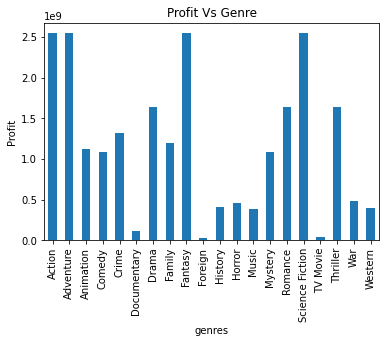

In [38]:
gen_prof = movies_df.groupby('genres').profit.max()
gen_prof.plot(kind='bar', ylabel='Profit', title='Profit Vs Genre');

From the plot above, Action, Adventure, Fantasy and Science Fiction are the movies which have made the highes profit so far and this goes with the analysis which shows that movies with high profit have high vote_count as was seen in the pie chart above, same with Foreign, Tv Movie and Documentary which have low rating resulting to very low profit.

<a id='conclusions'></a>
## Conclusions


> In the first section I examined how often a particular a particular genre of movie was produced and it turned out to be that alot of Drama movies have been produced over the years. 
>
> I also considered the Runtime of a movie, examining how thw runtime affects cost, which genre has longer runtime and what range has more popularity. From the examination, most movies do not exceed a runtime of 200 secs and which is also why movies within this range of runtime are realy popular. This examination also shows that longer runtime does not necessarily mean more cost and also does not mean a better rating since History genre has a high runtime but does not have a high rating as compared to others. This result made me particular about the History genre to know which year Historic movie started going more into production and the visualization sjows more Historic movies were produced around the year 2000-2015
>
> An examination of the vote_count for various genres showed that people prefer Sci-Fi, Action, Adventure and Fantasy as suspected. The vote_count is considered as the rating.
>
> Due to the current economic situations it was necessary to find out how the cost of produciong a movie has increased or decreased over the year and from the visualization, it actually did show an increase around 2000 but also shows a decrease and sometimes increase after year 2000 but cost has never been the same as it was in the 90's.
>
> In the last section I wanted to know what characteristics movies with high and low profit had, I guess it is quite normal that movies with high rating should have higher vote count which is why i decided to check which genre of movie has the highest profit and it showed that movies which actually had high rating had high profit indeed. 

##### LIMITATIONS
> 
> While examining the runtime, it showed some runtime recorded as 0 which should not be so. Take for example Mythica: The Necromancer which was recorded to have a runtime of 0 instead of 95 minutes and this also goes or the budget and revenue. I could have replaced this values with the mean but could affect the result.
>
> Also, in the calculation of the profit though revenue minus cost was used it wil be good to know for sure what and what was calculated to get the budget and revenue or was the budget stated exceeded or not. In terms of the popularity rating also, what factors was considered when assigning the popularity score. These are questions that if answered could give better analysis.

#### REFERENCES

> Stackoverflow
>
> Pandas


In [ ]:
prosper_loan_df['BorrowerAPR']=prosper_loan_df['BorrowerAPR'].replace('Not Available',0)
prosper_loan_df['EstimatedEffectiveYield']=prosper_loan_df['EstimatedEffectiveYield'].replace('Not Available',0)
prosper_loan_df['EstimatedLoss']=prosper_loan_df['EstimatedLoss'].replace('Not Available',0)
prosper_loan_df['DebtToIncomeRatio']=prosper_loan_df['DebtToIncomeRatio'].replace('Not Available',0)
prosper_loan_df['CreditScoreRangeLower']=prosper_loan_df['CreditScoreRangeLower'].replace('Not Available',0)
prosper_loan_df['CreditScoreRangeUpper']=prosper_loan_df['CreditScoreRangeUpper'].replace('Not Available',0)



def datatype_converter(df, col_name, datatype):
    df[col_name] = df[col_name].astype(datatype)
    return (df[col_name])

def int_replace(df,col_name,old,new):
    df[col_name]=df[col_name].replace(old,new)
    return(df[col_name])